In [35]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

from tqdm import tqdm

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (15, 6)
rcParams['image.cmap'] = 'viridis'

## [1] Задача

##### (К теоретическим задачам 1-3)
Сгенерируйте выборки $𝑋_1, ..., 𝑋_𝑁$ из всех распределений из задач 1-3 (𝑁 = 1000).

Для всех 𝑛 <=𝑁 посчитайте значение полученных оценок (по выборке $𝑋_1, . . . , 𝑋_𝑛$) методом моментов и методом максимального правдоподобия. 

Оцените дисперсию (с помощью выборочной дисперсии) каждой оценки, сгенерировав для каждой из них 𝐾 = 1000 бутстрепных выборок 
* а) с помощью параметрического бутстрепа (у каждого распределения и у каждой оценки своя бутстрепная выборка),
* б) с помощью непараметрического бутстрепа (у каждого распределения своя бутстрепная выборка). 

Проведите эксперимент для разных значений 𝜃
(рассмотрите не менее трех различных значений).

---

## Решение

## [2] Задача

На высоте 1 метр от поверхности Земли закреплено устройство, которое периодически излучает лучи на поверхность Земли (считайте, что поверхность Земли представляет из себя прямую). 

Пусть 𝑙 — перпендикуляр к поверхности Земли, опущенный из точки, в которой закреплено устройство. Угол к прямой 𝑙 (под которым происходит излучение) устройство выбирает случайно из равномерного распределения на отрезке $(−\pi/2, \pi/2)$ (все выборы осуществляются независимо).


Можно доказать, что в этих предположениях точки пересечения с поверхностью имеют распределение Коши
(плотность равна $\frac{\theta}{\pi(\theta^2+(x - x_0)^2)}$) с параметром масштаба $\theta = 1$.

Неизвестный параметр сдвига $𝑥_0$ соответствует проекции (вдоль прямой 𝑙) точки расположения устройства на поверхность Земли (направление оси и начало координат на поверхности Земли выбраны заранее некоторым образом независимо от расположения устройства). В файле Cauchy.csv находятся координаты точек пересечения лучей с поверхностью
Земли. Оцените параметр сдвига методом максимального правдоподобия 
* a) по половине выборки (первые 500 элементов выборки, т.е. выборка состоит из 1000 наблюдений);
* б) по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор точек с некоторым шагом и верните ту, на которой достигается максимум функции правдоподобия).


Известно, что параметр масштаба принадлежит интервалу [−1000, 1000].
Выберите шаг равным 0.01. Если получается долго или не хватает памяти, то уменьшите интервал поиска и поясните (в комментариях), почему берете именно такой интервал

---

## Решение

Из условия задачи плотность распределения Коши задается формулой (в нашей задаче):
$$f(x) = \frac{1}{\pi(1+(x - x_0)^2)} $$

* Функция правдоподобия по выборке размера N: $$L = \frac{1}{\pi(1+(x_1 - x_0)^2)} \cdot \frac{1}{\pi(1+(x_2 - x_0)^2)} \cdot ... \cdot \frac{1}{\pi(1+(x_N - x_0)^2)} =  \frac{1}{\pi^N \prod_{i=1}^N (1+(x_i - x_0)^2)}$$
* Логарифмируем ее и дифференцируем, получаем следующее:
 - $l(x, x_0) = -N\log\pi - \log\prod_{i=1}^N (1+(x_i - x_0)^2) $
 - $$\frac{\partial l}{\partial x_0} = \sum_{i=1}^{N}\frac{2(x-x_0)}{(1+(x-x_0)^2)}  = 0$$
 
Решить последнее уравнение совсем не просто, поэтому действуем как предложено в задании -- ищем по сетке значение, максимизирующее функцию правдоподобия. Но на деле удобнее минимизировать такую функцию (*):
$$\prod_{i=1}^N (1+(x_i - x_0)^2) $$


In [46]:
def max_likelihood(start, stop, step, X):
    """
    start -- начало интервала для поиска x0
    stop -- конец интервала для поиска x0
    step -- шаг по сетке
    X -- выборка
    
    """
    scale = 1000
    X_trsf = X/scale ## чтобы избежать переполнения
    
    def fun_to_min(x0):
        x0 = x0/scale ## все приводим к такому масштабу, даже x0
        return np.prod([(1+(x-x0)**2) for x in X_trsf], dtype=np.float32)
    
    search_range = np.arange(start, stop, step)
    print('Number of points to concider: {}'.format(len(search_range)))

    hist = []    
    best_pair = {'val':np.inf, 'x0':start}
    
    for x0 in tqdm(search_range):
        tmp_val = fun_to_min(x0)
        hist.append(tmp_val)
        if tmp_val < best_pair['val']:
            best_pair['val'] = tmp_val
            best_pair['x0'] = x0
    
    return best_pair, hist

Размер выборки: 1000
Медиана: -585.0


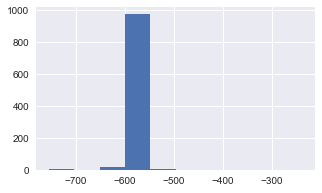

In [13]:
cauchy = pd.read_csv("../Cauchy.csv", header=None)
cauchy = np.array(cauchy[0])
print("Размер выборки:", len(cauchy))
print("Медиана:", np.median(cauchy))
plt.figure(figsize=(5,3))
plt.hist(cauchy)
plt.show()

Видно, что все значения отрицательные, причем большинство из них сосредоточено в интервале от -750 до -500;

Т.к. устройство из равномерного распределения на отрезке $(−\pi/2, \pi/2)$ выбирает угол, под которым излучать на поверхность Земли, то есть основания полагать, что координата устройства, а значит и $x_0$, расположена где-то на этом отрезке.
Но если даже она расположена не на нем, то очень маловероятно, чтобы координата устройства была расположена на положительной полуоси координат.

Поэтому я буду искать в итервале от -1000 до 0.


##### Для N = 1000

In [47]:
best_pair, hist = max_likelihood(-1000, 0, 0.01, cauchy)

  0%|          | 86/100000 [00:00<01:57, 853.18it/s]

Number of points to concider: 100000


100%|██████████| 100000/100000 [01:40<00:00, 998.75it/s]


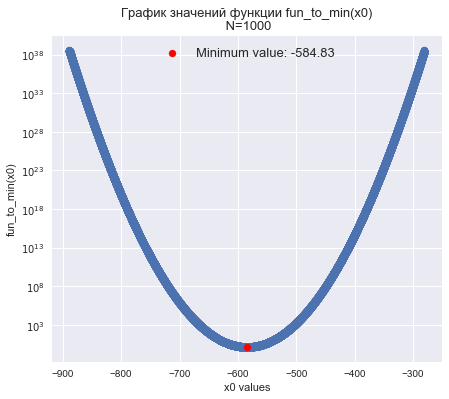

In [91]:
plt.figure(figsize=(7,6))
plt.scatter(np.arange(-1000, 0, 0.01), hist)
plt.title("График значений функции fun_to_min(x0)\n N=1000", fontsize = 13)
plt.scatter(best_pair['x0'], best_pair['val'], c='r', label = 'Minimum value: {}'.format(np.round(best_pair['x0'],2)))
plt.legend(fontsize = 13)
plt.xlabel('x0 values')
plt.ylabel('fun_to_min(x0)')
plt.semilogy()
plt.show()

##### Для N = 500

In [82]:
best_pair500, hist500 = max_likelihood(-1000, 0, 0.01, cauchy[:500])

  0%|          | 157/100000 [00:00<01:03, 1561.82it/s]

Number of points to concider: 100000


100%|██████████| 100000/100000 [01:03<00:00, 1573.31it/s]


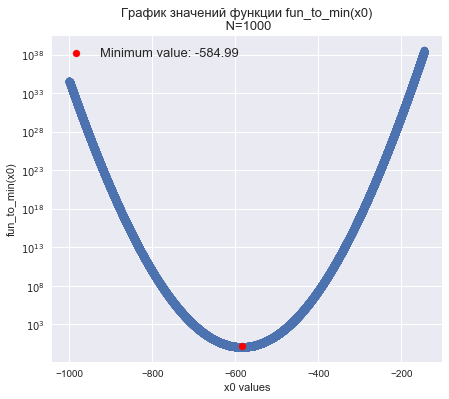

In [92]:
plt.figure(figsize=(7,6))
plt.scatter(np.arange(-1000, 0, 0.01), hist500)
plt.title("График значений функции fun_to_min(x0)\n N=1000", fontsize = 13)
plt.scatter(best_pair['x0'], best_pair['val'], c='r', label = 'Minimum value: {}'.format(np.round(best_pair500['x0'],2)))
plt.legend(fontsize = 13)
plt.xlabel('x0 values')
plt.ylabel('fun_to_min(x0)')
plt.semilogy()
plt.show()

### Вывод:

Полученные значения x0 по выборкам разных размеров согласуются между собой и со значением медианы распределения.

---

## [2] Задача
В банке каждую минуту подсчитывается баланс по сравнению с началом дня (6 часов утра).

В полночь работники банка измеряют две величины: $𝑋_1$ — максимальное значение баланса за день, $𝑋_2$ — значение баланса в полночь. Считается,что величина $𝑋 = 𝑋_1 − 𝑋_2$ имеет распределение Вейбулла с функцией распределения:

$$ F(x, \gamma) = 1 - e^{-x^{\gamma}} I(x \geq 0) $$

где 𝛾 > 0 — параметр формы. В течение 10 лет каждый день банк проводил измерение величины 𝑋, получив, в результате выборку
$𝑋_1, . . . , 𝑋_{3652}$. 

В файле **Weibull.csv** находятся соответствующие измерения. Оцените параметр формы методом максимального правдоподобия 
* a) по первым 4 годам;
* б) по всей выборке. 

Оценку произведите по сетке (в логарифмической шкале). Известно,
что $\log_{10} \gamma ∈ [−2, 2]$. Выберите шаг равным $10^{−3}$

---

### Решение


1) Найдем функцию плотности распределения, $x \geq 0$:
$$F'_x (x,\gamma) = f(x, \gamma) = \gamma \cdot x^{\gamma - 1} e^{-x^{\gamma}}$$

2) Функция правдоподобия:
$$ L (x, \gamma) = \gamma^N \prod_{i=1}^{N} e^{-x^{\gamma}_i} \cdot x_i^{\gamma - 1} = \gamma^N e^{- \sum^N_{i=1} x^{\gamma}_i} \prod_{i=1}^{N} x_i^{\gamma - 1} $$

3) Логарифм от функции правдоподобия:
$$ l (x, \gamma) = N\log \gamma - \sum_{i=1}^{N} x_i^{\gamma} + (\gamma - 1) \cdot \sum_{i=1}^{N}\log x_i $$


Максимизируем функцию правдоподобия, исключаем из выборки 0, т.к. согласно распределению их не должно быть.

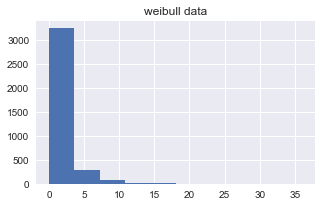

In [101]:
weibull = pd.read_csv("../Weibull.csv", header=None)
weibull = np.array(weibull[0])
plt.figure(figsize=(5,3))
plt.title('weibull data')
plt.hist(weibull)
plt.show()

In [258]:
def max_likelihood_weibull(X, start = -2, stop = 1, step = -3):
    """
    10**start -- начало интервала для поиска g
    10**stop -- конец интервала для поиска g
    10**step -- шаг по сетке
    X -- выборка
    
    """
    
    X = X[X>0] ## убрали нули, потому что согласно распределению их быть не должно
    N = len(X)
    
    def fun_to_max(g):
        res = N*np.log(g) - np.sum(X**g)+(g-1)*np.sum(np.log(X))
        if not np.isfinite(res):
            print(g)
        assert np.isfinite(res)
        return res
    
    search_range = np.arange(10**start, 10**stop, 10**step)
    print('Number of points to concider: {}'.format(len(search_range)))

    hist = []    
    best_pair = {'val':-np.inf, 'gamma':start}
    
    for g in tqdm(search_range):
        tmp_val = fun_to_max(g)
        hist.append(tmp_val)
        if tmp_val > best_pair['val']:
            best_pair['val'] = tmp_val
            best_pair['gamma'] = g
    
    return best_pair, hist

In [232]:
best_pair, hist = max_likelihood_weibull(weibull[:365*4])

  6%|▌         | 568/9990 [00:00<00:01, 5675.74it/s]

Number of points to concider: 9990


100%|██████████| 9990/9990 [00:01<00:00, 6745.15it/s]


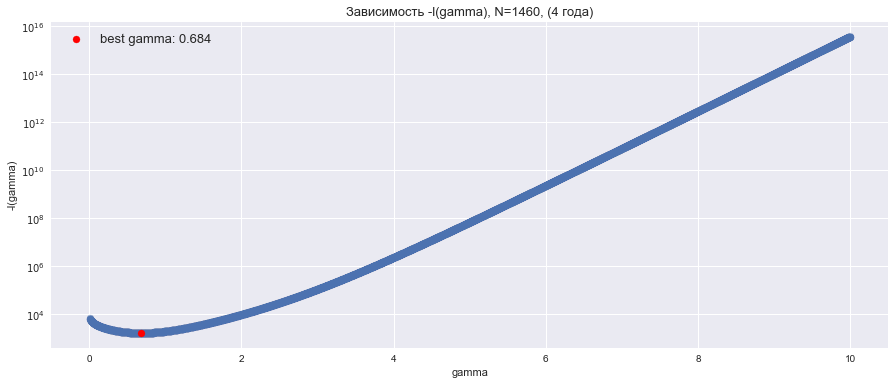

In [273]:
plt.scatter(np.arange(10**(-2), 10**1, 10**(-3)), -hist, alpha=0.3)
plt.scatter(best_pair['gamma'], -best_pair['val'], c='r', label = 'best gamma: {}'.format(np.round(best_pair['gamma'],5)))
plt.legend(fontsize = 13)
plt.title("Зависимость -l(gamma), N={}, (4 года)".format(365*4), fontsize = 13)
plt.xlabel("gamma")
plt.ylabel('-l(gamma)')
# plt.loglog()
plt.semilogy()
# plt.ylim((-10**5, 0))
plt.show()

In [274]:
best_pair, hist = max_likelihood_weibull(weibull)

  3%|▎         | 313/9990 [00:00<00:03, 3119.74it/s]

Number of points to concider: 9990


100%|██████████| 9990/9990 [00:03<00:00, 2805.63it/s]


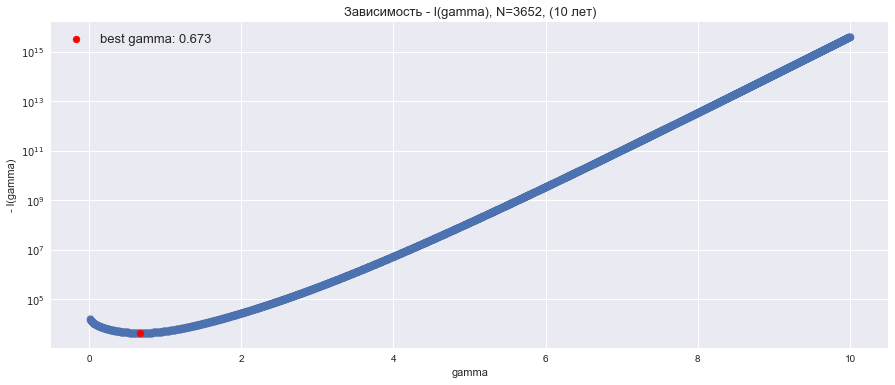

In [277]:
tmp = np.array(hist)
# plt.plot(np.arange(10**(-2), 10**1, 10**(-3)), - tmp)
plt.scatter(np.arange(10**(-2), 10**1, 10**(-3)), - tmp, alpha=0.3)
plt.scatter(best_pair['gamma'], -best_pair['val'], c='r', label = 'best gamma: {}'.format(np.round(best_pair['gamma'],5)))
plt.legend(fontsize = 13)
plt.title("Зависимость - l(gamma), N={}, (10 лет)".format(len(weibull)), fontsize = 13)
plt.xlabel("gamma")
plt.ylabel('- l(gamma)')
plt.semilogy()
plt.show()